In [178]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')


In [179]:
def my_der_calc(f, a, b, N, option):
    x = np.arange(a, b, N)
    y = f(x)
    # Panjang dari data yang kita tentukan
    size = x.size
    X = []

    if (option == "forward"):
        print("Menghitung menggunakan Forward Difference Approximation")
        print("Dengan catatan angka terakhir tidak bisa dicari!")
        X = x[0:size-1]
    elif (option == "backward"):
        print("Menghitung menggunakan Backward Difference Approximation")
        print("Dengan catatan angka pertama tidak bisa dicari!")
        X = x[1:size]

    elif (option == "central"):
        print("Menghitung menggunakan Central Difference Approximation")
        print("Dengan catatan angka pertama dan angka terakhir tidak bisa dicari!")
        X = x[1:size-1]
    else:
        print("Wrong Option! Please kindly check the uppercase too.")
        return

    df = []

    # Memilih satu kali loop saja sampai size supaya efisien penulisan code
    # dan nanti kita lakukan operasi sesuai parameter yang diberi user.
    for i in range(size):
        if (option == "forward"):
            # Elemen terakhir tidak bisa dicari karena rumus x+h atau elemen selanjutnya.
            if i == size - 1:
                continue
            dx = (y[i+1] - y[i]) / N
            df.append(dx)

        elif (option == "backward"):
            # Elemen pertama tidak bisa dicari karena rumus x-h atau elemen sebelumnya.
            if i == 0:
                continue
            dx = (y[i] - y[i-1]) / N
            df.append(dx)

        elif (option == "central"):
            # Elemen pertama dan terakhir tidak bisa dicari
            # karena rumus x-h dan x + h atau elemen sebelum dan sesudahnya.
            if i == 0 or i == size - 1:
                continue
            dx = (y[i+1] - y[i-1]) / (2*N)
            df.append(dx)

    print("Hasil:")
    print(f"X = {X}")
    print(f"df = {df}")

    return X, df

# Masukkan fungsi anda di sini, untuk contoh agar mudah pengecekan
# saya menggunakan x^2


def f(x): return x**3 + x**2 + x
def df(x): return 3*(x**2) + x + 1


In [180]:
a = 50
b = 200
N = 15

Xreal = np.arange(a, b, N)
Yreal = f(Xreal)
dxreal = df(Xreal)
print(f"x = {Xreal}")
print("y = x^2")
print(f"y = {Yreal}")
print("dy = 2 * x")
print(f"dy = {dxreal}")

x = [ 50  65  80  95 110 125 140 155 170 185]
y = x^2
y = [ 127550  278915  518480  866495 1343210 1968875 2763740 3748055 4942070
 6366035]
dy = 2 * x
dy = [  7551  12741  19281  27171  36411  47001  58941  72231  86871 102861]


Menghitung menggunakan Forward Difference Approximation
Dengan catatan angka terakhir tidak bisa dicari!
Hasil:
X = [ 50  65  80  95 110 125 140 155 170]
df = [10091.0, 15971.0, 23201.0, 31781.0, 41711.0, 52991.0, 65621.0, 79601.0, 94931.0]


Menghitung menggunakan Backward Difference Approximation
Dengan catatan angka pertama tidak bisa dicari!
Hasil:
X = [ 65  80  95 110 125 140 155 170 185]
df = [10091.0, 15971.0, 23201.0, 31781.0, 41711.0, 52991.0, 65621.0, 79601.0, 94931.0]


Menghitung menggunakan Central Difference Approximation
Dengan catatan angka pertama dan angka terakhir tidak bisa dicari!
Hasil:
X = [ 65  80  95 110 125 140 155 170]
df = [13031.0, 19586.0, 27491.0, 36746.0, 47351.0, 59306.0, 72611.0, 87266.0]


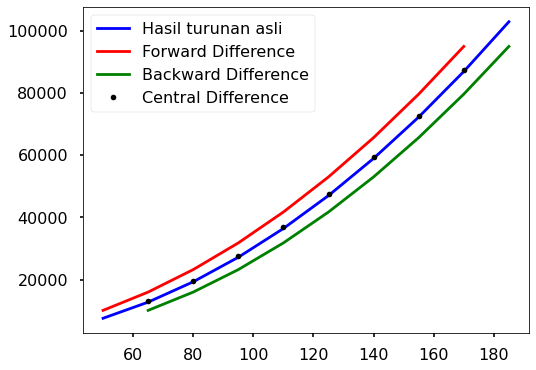

In [181]:
Xforward, dxforward = my_der_calc(f, a, b, N, "forward")
print("\n")
Xbackward, dxbackward = my_der_calc(f, a, b, N, "backward")
print("\n")
Xcentral, dxcentral = my_der_calc(f, a, b, N, "central")
    
plt.figure(figsize=(8, 6))
plt.plot(Xreal, dxreal, "b")
plt.plot(Xforward, dxforward, "r-")
plt.plot(Xbackward, dxbackward, "g-")
plt.plot(Xcentral, dxcentral, "k.")
plt.legend(["Hasil turunan asli", "Forward Difference", "Backward Difference", "Central Difference"])
plt.show()